In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PyLearn/Assignment_51_7.1/features.csv')
df.head()

,label,file_name,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_502,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511
0,Bahram_Radan,Datasets/PersianFace/Bahram_Radan/Bahram Radan...,0.108864,0.484667,0.187422,0.093203,0.206806,0.050065,0.186583,-0.152158,...,-0.050544,0.230124,0.142929,0.164893,0.212705,-0.460179,-0.118002,0.084906,0.538402,0.152325
1,Bahram_Radan,Datasets/PersianFace/Bahram_Radan/Bahram Radan...,0.153871,0.071240,0.333966,0.106579,0.099243,0.084470,0.087038,-0.107057,...,0.091650,-0.003303,-0.056057,-0.040689,0.038452,-0.318929,-0.073892,0.222009,0.302453,0.092268
2,Bahram_Radan,Datasets/PersianFace/Bahram_Radan/Bahram Radan...,0.019485,0.270387,0.121900,0.157542,0.227794,0.033846,0.272981,-0.167279,...,0.050724,0.128263,0.042840,-0.029435,0.303992,-0.287529,-0.091047,-0.277219,0.351164,0.202507
3,Bahram_Radan,Datasets/PersianFace/Bahram_Radan/Bahram Radan...,0.116347,0.412593,0.210791,0.074177,0.011241,0.075367,0.264233,-0.147184,...,-0.061523,0.164063,0.120311,-0.070949,0.271467,-0.168666,-0.035562,0.164003,0.568420,0.228852
4,Bahram_Radan,Datasets/PersianFace/Bahram_Radan/Bahram Radan...,-0.232697,0.510013,-0.088018,-0.579030,-0.049812,0.289211,-0.144671,-0.129927,...,-1.051914,0.099138,0.351319,-0.734842,0.237939,-0.354433,-0.020665,-0.027387,-0.467633,-0.980666


In [4]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [5]:
classes = label_encoder.classes_
mapping = dict(zip(classes, range(len(classes))))
mapping

{'Adel_FerdowsiPour': 0,
 'Ali_Daei': 1,
 'Ali_Khamenei': 2,
 'Asghar_Farhadi': 3,
 'Bahare_Rahnama': 4,
 'Bahram_Radan': 5,
 'Behnam_Bani': 6,
 'Behnoosh_Tabatabaee': 7,
 'Dariush_Arjmand': 8,
 'Ebi': 9,
 'Ehsan_Alikhani': 10,
 'Elham_Hamidi': 11,
 'Elnaz_Shakerdoost': 12,
 'Golshifteh_Farahani': 13,
 'Hamid_Lolaei': 14,
 'Hassan_Rouhani': 15,
 'Hootan_Shakiba': 16,
 'Javad_Khiabani': 17,
 'Javad_Razavian': 18,
 'Katayoun_Riahee': 19,
 'Leyla_Hatami': 20,
 'Mahnaz_Afshar': 21,
 'Mehran_Ghafourian': 22,
 'Mehran_Modiri': 23,
 'Mohsen_Chavoshi': 24,
 'Mohsen_Tanabandeh': 25,
 'Parinaz_Izadyar': 26,
 'Parsa_Pirozfar': 27,
 'Parviz_Parastooee': 28,
 'Sahar_Dolarshahi': 29,
 'Shahab_Hosseini': 30,
 'Siamak_Ansari': 31,
 'Siavash_Ghomayshi': 32,
 'Tannaz_Tabatabaee': 33,
 'Taraneh_Alidoosti': 34}

In [6]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=.25, random_state=42)

print(f'Train X:{x_train.shape}, Y:{y_train.shape}')
print(f'Validation X:{x_validation.shape}, Y:{y_validation.shape}')
print(f'Test X:{x_test.shape}, Y:{y_test.shape}')

Train X:(1388, 512), Y:(1388,)
Validation X:(87, 512), Y:(87,)
Test X:(261, 512), Y:(261,)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(256, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(35, activation=tf.keras.activations.softmax)
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
train_result = model.fit(x_train, y_train, epochs=300, validation_data=(x_validation, y_validation))

Epoch 1/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.0219 - loss: 3.6794 - val_accuracy: 0.0230 - val_loss: 3.6081
Epoch 2/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0404 - loss: 3.5179 - val_accuracy: 0.0230 - val_loss: 3.5448
Epoch 3/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0283 - loss: 3.4924 - val_accuracy: 0.0230 - val_loss: 3.5086
Epoch 4/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0315 - loss: 3.4563 - val_accuracy: 0.0345 - val_loss: 3.4825
Epoch 5/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0581 - loss: 3.4342 - val_accuracy: 0.0345 - val_loss: 3.4591
Epoch 6/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0628 - loss: 3.4239 - val_accuracy: 0.0345 - val_loss: 3.4428
Epoch 7/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0648 - loss: 3.4066 - val_accuracy: 0.0345 - val_loss: 3.4272
Epoch 8/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0719 - loss: 3.3819 - val_accuracy: 0.0345 - 

In [13]:
test_result = model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8714 - loss: 0.5817


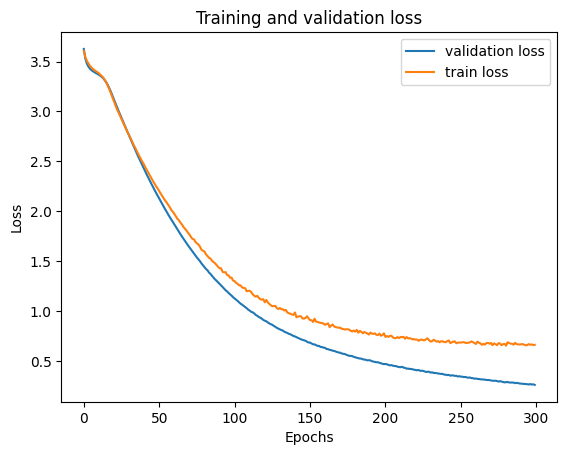

In [14]:
plt.plot(train_result.history['loss'], label='validation loss')
plt.plot(train_result.history['val_loss'], label='train loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

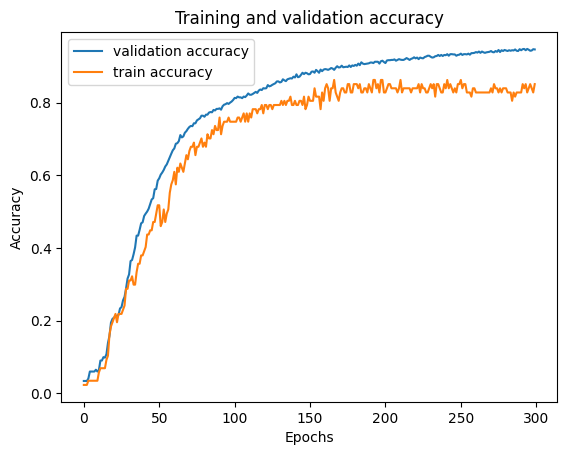

In [15]:
plt.plot(train_result.history['accuracy'], label='validation accuracy')
plt.plot(train_result.history['val_accuracy'], label='train accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [16]:
model.save('/content/drive/MyDrive/PyLearn/Assignment_51_7.1/Model/model.h5')
model.save('/content/drive/MyDrive/PyLearn/Assignment_51_7.1/Model/model.keras')